In [ ]:
import tensorflow as tf

(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


In [ ]:
X = tf.keras.layers.Input(shape=[28, 28])
H = tf.keras.layers.Flatten()(X)
H = tf.keras.layers.Dense(128, activation='relu')(H)
Y = tf.keras.layers.Dense(10, activation="softmax")(H)

model = tf.keras.Model(X, Y)
model.compile(loss='sparse_categorical_crossentropy', metrics='accuracy')

In [ ]:
model.fit(x_train, y_train, epochs=10, batch_size=128, validation_split=0.2)

## 기존의 정석

In [ ]:
import tensorflow as tf

(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

x_train = x_train.reshape(-1, 28 * 28)
x_test = x_test.reshape(-1, 28 * 28)

y_train = tf.keras.utils.to_categorical(y_train)
y_test = tf.keras.utils.to_categorical(y_test)

print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)


(60000, 784) (60000, 10)
(10000, 784) (10000, 10)


In [ ]:
X = tf.keras.layers.Input(shape=[784])
H = tf.keras.layers.Flatten()(X)
H = tf.keras.layers.Dense(128, activation='relu')(H)
Y = tf.keras.layers.Dense(10, activation="softmax")(H)

model = tf.keras.Model(X, Y)
model.compile(loss='categorical_crossentropy', metrics='accuracy')

In [ ]:
model.fit(x_train, y_train, epochs=10, batch_size=128, validation_split=0.2)

## CNN
LeNet
<img src="https://lh3.googleusercontent.com/proxy/AZu6SeQGpnRQ14uP-t2DkGX7UFLkxtKz0bh11Axjf0-KgFCO5bWYgTNZyYY4gzdXH45jCCYSjOnhEDTe5O0SCoxDZlpngfqyUN0Pk7kd4WrIPLktBA3LDCvps0CukgIfi4E3DIqCQh3_Y4QpFUnCI36okfQilV5ce4-ONfwZWQLnhDOOKBlrFhdeZaoii23dwvHva9b69tARPwEYnufu9Jt2Kt_x9Cfd2pksOzaX-N6KENDRvIWCBlQnJsDps-iqNoqn2699XCsNKNqxB_k">

In [ ]:
import tensorflow as tf

(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()
print(x_train.shape, y_train.shape)

x_train = x_train.reshape(-1, 28, 28, 1) / 255
x_test = x_test.reshape(-1, 28, 28, 1) / 255

print(x_train.shape, y_train.shape)

(60000, 28, 28) (60000,)
(60000, 28, 28, 1) (60000,)


In [ ]:
X = tf.keras.layers.Input(shape=[28, 28, 1])

H = tf.keras.layers.Conv2D(6, kernel_size=5, padding='same', activation='swish')(X)
# (5, 5, 1) x 6 => (28, 28, 6)
H = tf.keras.layers.MaxPool2D()(H)

H = tf.keras.layers.Conv2D(16, kernel_size=5, activation='swish')(H)
# (5, 5, 6) x 16 => (24, 24, 16)
H = tf.keras.layers.MaxPool2D()(H)

H = tf.keras.layers.Flatten()(H)
H = tf.keras.layers.Dense(120, activation='swish')(H)
H = tf.keras.layers.Dense(84, activation='swish')(H)
Y = tf.keras.layers.Dense(10, activation='softmax')(H)

model = tf.keras.Model(X, Y)
model.compile(loss='sparse_categorical_crossentropy', metrics='accuracy')

In [ ]:
model.summary()

Model: "model_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_5 (InputLayer)         [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 28, 28, 6)         156       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 14, 14, 6)         0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 10, 10, 16)        2416      
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 5, 5, 16)          0         
_________________________________________________________________
flatten_4 (Flatten)          (None, 400)               0         
_________________________________________________________________
dense_10 (Dense)             (None, 120)               4812

In [ ]:
model.fit(x_train, y_train, epochs=10, batch_size=128, validation_split=0.2)

Epoch 1/10
375/375 [==============================] - 16s 40ms/step - loss: 0.6870 - accuracy: 0.7915 - val_loss: 0.1435 - val_accuracy: 0.9590
Epoch 2/10
375/375 [==============================] - 15s 40ms/step - loss: 0.1284 - accuracy: 0.9621 - val_loss: 0.0866 - val_accuracy: 0.9748
Epoch 3/10
375/375 [==============================] - 15s 40ms/step - loss: 0.0730 - accuracy: 0.9778 - val_loss: 0.0610 - val_accuracy: 0.9815
Epoch 4/10
375/375 [==============================] - 15s 40ms/step - loss: 0.0581 - accuracy: 0.9829 - val_loss: 0.0597 - val_accuracy: 0.9808
Epoch 5/10
375/375 [==============================] - 15s 40ms/step - loss: 0.0418 - accuracy: 0.9862 - val_loss: 0.0628 - val_accuracy: 0.9806
Epoch 6/10
375/375 [==============================] - 15s 40ms/step - loss: 0.0355 - accuracy: 0.9882 - val_loss: 0.0624 - val_accuracy: 0.9812
Epoch 7/10
375/375 [==============================] - 15s 40ms/step - loss: 0.0302 - accuracy: 0.9907 - val_loss: 0.0495 - val_accuracy:

# RNN

In [ ]:
import tensorflow as tf

(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()
print(x_train.shape, y_train.shape)

x_train = x_train / 255
x_test = x_test / 255

(60000, 28, 28) (60000,)


In [ ]:
X = tf.keras.layers.Input(shape=[28, 28])

H = tf.keras.layers.LSTM(32)(X)
# cell = tf.keras.layers.SimpleRNNCell(32)
# H = tf.keras.layers.RNN(cell)(X)

Y = tf.keras.layers.Dense(10, activation='softmax')(H)

model = tf.keras.Model(X, Y)
model.compile(loss="sparse_categorical_crossentropy", metrics='accuracy')
model.summary()

Model: "model_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_10 (InputLayer)        [(None, 28, 28)]          0         
_________________________________________________________________
lstm (LSTM)                  (None, 32)                7808      
_________________________________________________________________
dense_9 (Dense)              (None, 10)                330       
Total params: 8,138
Trainable params: 8,138
Non-trainable params: 0
_________________________________________________________________


In [ ]:
(60 * 32 + 32) * 4

7808

In [ ]:
model.fit(x_train, y_train, epochs=10, batch_size=128, validation_split=0.2)

Epoch 1/10
375/375 [==============================] - 6s 6ms/step - loss: 1.6370 - accuracy: 0.4616 - val_loss: 0.6603 - val_accuracy: 0.8002
Epoch 2/10
375/375 [==============================] - 2s 5ms/step - loss: 0.5817 - accuracy: 0.8222 - val_loss: 0.3578 - val_accuracy: 0.8910
Epoch 3/10
375/375 [==============================] - 2s 5ms/step - loss: 0.3340 - accuracy: 0.8998 - val_loss: 0.2361 - val_accuracy: 0.9313
Epoch 4/10
375/375 [==============================] - 2s 5ms/step - loss: 0.2380 - accuracy: 0.9276 - val_loss: 0.2126 - val_accuracy: 0.9367
Epoch 5/10
375/375 [==============================] - 2s 5ms/step - loss: 0.1855 - accuracy: 0.9451 - val_loss: 0.1668 - val_accuracy: 0.9494
Epoch 6/10
375/375 [==============================] - 2s 5ms/step - loss: 0.1579 - accuracy: 0.9545 - val_loss: 0.1413 - val_accuracy: 0.9585
Epoch 7/10
375/375 [==============================] - 2s 5ms/step - loss: 0.1416 - accuracy: 0.9583 - val_loss: 0.1293 - val_accuracy: 0.9624
Epoch 

In [ ]:
model.evaluate(x_test, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.1012 - accuracy: 0.9694


[0.10118352621793747, 0.9693999886512756]

## fashion_mnist

In [ ]:
import tensorflow as tf

(x_train, y_train), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()

x_train = x_train / 255
x_test = x_test / 255
print(x_train.shape, x_test.shape)
print(y_train.shape, y_test.shape)

(60000, 28, 28) (10000, 28, 28)
(60000,) (10000,)


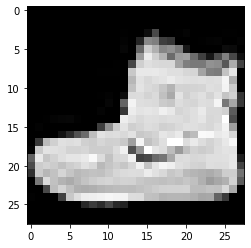

In [ ]:
import matplotlib.pyplot as plt
plt.imshow(x_train[0], cmap='gray')

In [ ]:
X1 = tf.keras.layers.Input(shape=[28, 28, 1])

# CNN 구조
H1 = tf.keras.layers.Conv2D(6, kernel_size=5, padding='same', activation='swish')(X1)
H1 = tf.keras.layers.MaxPool2D()(H1)

H1 = tf.keras.layers.Conv2D(16, kernel_size=5, activation='swish')(H1)
H1 = tf.keras.layers.MaxPool2D()(H1)

H1 = tf.keras.layers.Flatten()(H1)
H1 = tf.keras.layers.Dense(120, activation='swish')(H1)
H1 = tf.keras.layers.Dense(84, activation='swish')(H1)
Y1 = tf.keras.layers.Dense(10, activation='softmax')(H1)

model1 = tf.keras.Model(X1, Y1)
model1.compile(loss='sparse_categorical_crossentropy', metrics='accuracy')
model1.summary()

X2 = tf.keras.layers.Input(shape=[28, 28])

# RNN 구조
H2 = tf.keras.layers.LSTM(32)(X2)
Y2 = tf.keras.layers.Dense(10, activation='softmax')(H2)

model2 = tf.keras.Model(X2, Y2)
model2.compile(loss='sparse_categorical_crossentropy', metrics='accuracy')
model2.summary()

# RNN 구조의 결과 + CNN 구조의 결과를 합쳐서 결과를 새로운 모델을 만든다.
H = tf.keras.layers.Concatenate()([H1, H2]) # 84 + 32 = 116
Y = tf.keras.layers.Dense(10, activation='softmax')(H)

model3 = tf.keras.Model([X1, X2], Y)
model3.compile(loss='sparse_categorical_crossentropy', metrics='accuracy')
model3.summary()

Model: "model_15"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_16 (InputLayer)        [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 28, 28, 6)         156       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 14, 14, 6)         0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 10, 10, 16)        2416      
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 5, 5, 16)          0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 400)               0         
_________________________________________________________________
dense_21 (Dense)             (None, 120)               481

In [ ]:
model1.fit(x_train.reshape(-1, 28, 28, 1), y_train, 
           epochs=10, batch_size=128, validation_split=0.2)

In [ ]:
model2.fit(x_train, y_train, 
           epochs=10, batch_size=128, validation_split=0.2)

In [ ]:
model3.fit([x_train.reshape(-1, 28, 28, 1), x_train], y_train, 
           epochs=10, batch_size=128, validation_split=0.2)

Epoch 1/10
375/375 [==============================] - 5s 9ms/step - loss: 0.9696 - accuracy: 0.6414 - val_loss: 0.4936 - val_accuracy: 0.8218
Epoch 2/10
375/375 [==============================] - 3s 8ms/step - loss: 0.4564 - accuracy: 0.8309 - val_loss: 0.3858 - val_accuracy: 0.8563
Epoch 3/10
375/375 [==============================] - 3s 8ms/step - loss: 0.3718 - accuracy: 0.8611 - val_loss: 0.3645 - val_accuracy: 0.8652
Epoch 4/10
375/375 [==============================] - 3s 9ms/step - loss: 0.3417 - accuracy: 0.8742 - val_loss: 0.3458 - val_accuracy: 0.8721
Epoch 5/10
375/375 [==============================] - 3s 9ms/step - loss: 0.3097 - accuracy: 0.8849 - val_loss: 0.3205 - val_accuracy: 0.8792
Epoch 6/10
375/375 [==============================] - 3s 8ms/step - loss: 0.2941 - accuracy: 0.8917 - val_loss: 0.3038 - val_accuracy: 0.8900
Epoch 7/10
375/375 [==============================] - 3s 8ms/step - loss: 0.2756 - accuracy: 0.8964 - val_loss: 0.3071 - val_accuracy: 0.8873
Epoch 

## 주식 데이터 
- https://raw.githubusercontent.com/blackdew/DeepLearningZeroToAll/master/data-02-stock_daily.csv

In [ ]:
import pandas as pd
url = "https://raw.githubusercontent.com/blackdew/DeepLearningZeroToAll/master/data-02-stock_daily.csv"
데이터 = pd.read_csv(url, skiprows=1)

print(데이터.shape)
데이터.head()

data = 데이터.values # 넘파이 어레이
data = data[::-1] # 역순으로
data[:5]

(732, 5)


array([[   568.00257 ,    568.00257 ,    552.922516,  13100.      ,
           558.462551],
       [   561.202549,    566.43259 ,    558.672539,  41200.      ,
           559.992565],
       [   566.892592,    567.002574,    556.932537,  10800.      ,
           556.972503],
       [   558.712504,    568.452595,    558.712504,   7900.      ,
           567.162558],
       [   599.992707,    604.832763,    562.192568, 147100.      ,
           567.002574]])

In [ ]:
import numpy as np

# normalize
data1 = (data - data.min(axis=0)) / (data.max(axis=0) - data.min(axis=0))

# 7개씩 끊어서 독립변수 input을 구성 
# 개별 관측치 => (7, 5)
# 전체 데이터셋 => (725, 7, 5)
x_train = np.array([data1[i:i+7] for i in range(len(data1) - 7)])
print(x_train.shape)

# 종속변수 label를 구성
# 전체 데이터셋 => (725, 1), (725, )
y_train = np.array([data[i+7, -1] for i in range(len(data) - 7)]).reshape(-1, 1)
print(y_train.shape)

(725, 7, 5)
(725, 1)


In [ ]:
import tensorflow as tf

X = tf.keras.layers.Input(shape=[7, 5])
H = tf.keras.layers.LSTM(32)(X)
H = tf.keras.layers.Dense(32, activation="swish")(H)
Y = tf.keras.layers.Dense(1)(H)

model = tf.keras.Model(X, Y)
model.compile(loss='mse')

In [ ]:
for i in range(10):
    model.fit(x_train, y_train, batch_size=128, epochs=100, validation_split=0.2, verbose=0)
    model.fit(x_train, y_train, batch_size=128, epochs=1, validation_split=0.2)

5/5 [==============================] - 0s 19ms/step - loss: 97.8114 - val_loss: 166.0184


In [ ]:
import math
math.sqrt(7000)

83.66600265340756